# 05_Analysis Previous Applications Dataset
In this notebook I analyze the previous_application dataset which is described below:
- Contains data on clients that have had previous loans with Home Credit.

**Analysis Summary**:
- After analyzing the dataset I created an aggregate table of four functions ('minimum', 'maximum', 'mean','standard deviation') SK_ID_CURR for the AMT_ANNUITY,AMT_APPLICATION andAMT_CREDIT fields. Each field would have a new column for each of the functions. This created a total of 12 features. By taking this approach I figure there will be many fields available during model selection that can be removed if there feature importance is zero.

- I also created new columns from some of the category fields by pivoting the count of each unique item within the field.

In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## 5.1 Import data and overview data

In [42]:
prev = pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\previous_application.csv")
FieldsNames = pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\HomeCredit_columns_description.csv")

In [44]:
# print description of each field in the table
Info = FieldsNames[FieldsNames['Table'] == 'previous_application.csv'][['Row','Description']]

In [45]:
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
prev.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [47]:
float_col = prev.select_dtypes(["float"]).columns

In [48]:
prev[float_col].describe().T

,count,mean,std,min,25%,50%,75%,max
AMT_ANNUITY,1297979.0,15955.120659,14782.137335,0.000000,6321.780000,11250.000000,20658.420000,418058.145
AMT_APPLICATION,1670214.0,175233.860360,292779.762386,0.000000,18720.000000,71046.000000,180360.000000,6905160.000
AMT_CREDIT,1670213.0,196114.021218,318574.616547,0.000000,24160.500000,80541.000000,216418.500000,6905160.000
AMT_DOWN_PAYMENT,774370.0,6697.402139,20921.495410,-0.900000,0.000000,1638.000000,7740.000000,3060045.000
AMT_GOODS_PRICE,1284699.0,227847.279283,315396.557937,0.000000,50841.000000,112320.000000,234000.000000,6905160.000
RATE_DOWN_PAYMENT,774370.0,0.079637,0.107823,-0.000015,0.000000,0.051605,0.108909,1.000
RATE_INTEREST_PRIMARY,5951.0,0.188357,0.087671,0.034781,0.160716,0.189122,0.193330,1.000
RATE_INTEREST_PRIVILEGED,5951.0,0.773503,0.100879,0.373150,0.715645,0.835095,0.852537,1.000
CNT_PAYMENT,1297984.0,16.054082,14.567288,0.000000,6.000000,12.000000,24.000000,84.000
DAYS_FIRST_DRAWING,997149.0,342209.855039,88916.115833,-2922.000000,365243.000000,365243.000000,365243.000000,365243.000


In [49]:
for i in float_col:
    for j in Info.values.tolist():
       if i == j[0]:
           print(i,":",j[1],"\n","-"*100)

AMT_ANNUITY : Annuity of previous application 
 ----------------------------------------------------------------------------------------------------
AMT_APPLICATION : For how much credit did client ask on the previous application 
 ----------------------------------------------------------------------------------------------------
AMT_CREDIT : Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT 
 ----------------------------------------------------------------------------------------------------
AMT_DOWN_PAYMENT : Down payment on the previous application 
 ----------------------------------------------------------------------------------------------------
AMT_GOODS_PRICE : Goods price of good that client asked for (if applicable) on the previous application 
 ----------------------

In [50]:
int_col = prev.select_dtypes(["integer"]).columns

In [51]:
prev[int_col].describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.0,1.923089e+06,532597.958696,1000001.0,1461857.25,1923110.5,2384279.75,2845382.0
SK_ID_CURR,1670214.0,2.783572e+05,102814.823849,100001.0,189329.00,278714.5,367514.00,456255.0
HOUR_APPR_PROCESS_START,1670214.0,1.248418e+01,3.334028,0.0,10.00,12.0,15.00,23.0
NFLAG_LAST_APPL_IN_DAY,1670214.0,9.964675e-01,0.059330,0.0,1.00,1.0,1.00,1.0
DAYS_DECISION,1670214.0,-8.806797e+02,779.099667,-2922.0,-1300.00,-581.0,-280.00,-1.0
SELLERPLACE_AREA,1670214.0,3.139511e+02,7127.443459,-1.0,-1.00,3.0,82.00,4000000.0


In [52]:
for i in int_col:
    for j in Info.values.tolist():
       if i == j[0]:
           print(i,":",j[1],"\n","-"*100)

SK_ID_CURR : ID of loan in our sample 
 ----------------------------------------------------------------------------------------------------
HOUR_APPR_PROCESS_START : Approximately at what day hour did the client apply for the previous application 
 ----------------------------------------------------------------------------------------------------
NFLAG_LAST_APPL_IN_DAY : Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice 
 ----------------------------------------------------------------------------------------------------
DAYS_DECISION : Relative to current application when was the decision about previous application made 
 ----------------------------------------------------------------------------------------------------
SELLERPLACE_AREA : Selling area of seller place of the previous application 
 -----------------------

In [53]:
cat_col = prev.select_dtypes(["object"]).columns

In [54]:
prev[cat_col].describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,1670214,4,Cash loans,747553
WEEKDAY_APPR_PROCESS_START,1670214,7,TUESDAY,255118
FLAG_LAST_APPL_PER_CONTRACT,1670214,2,Y,1661739
NAME_CASH_LOAN_PURPOSE,1670214,25,XAP,922661
NAME_CONTRACT_STATUS,1670214,4,Approved,1036781
NAME_PAYMENT_TYPE,1670214,4,Cash through the bank,1033552
CODE_REJECT_REASON,1670214,9,XAP,1353093
NAME_TYPE_SUITE,849809,7,Unaccompanied,508970
NAME_CLIENT_TYPE,1670214,4,Repeater,1231261
NAME_GOODS_CATEGORY,1670214,28,XNA,950809


In [56]:
for i in cat_col:
    for j in Info.values.tolist():
       if i == j[0]:
           print(i,":",j[1],"\n","-"*100)

NAME_CONTRACT_TYPE : Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application 
 ----------------------------------------------------------------------------------------------------
WEEKDAY_APPR_PROCESS_START : On which day of the week did the client apply for previous application 
 ----------------------------------------------------------------------------------------------------
FLAG_LAST_APPL_PER_CONTRACT : Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract 
 ----------------------------------------------------------------------------------------------------
NAME_CASH_LOAN_PURPOSE : Purpose of the cash loan 
 ----------------------------------------------------------------------------------------------------
NAME_CONTRACT_STATUS : Contract status (approved, cancelled, ...) of previous application 
 -----------------------------------------------

## 5.2 Plot Certain String Type Fields
Here we plot certain fields to visualize their distriutions.

In [58]:
prev[cat_col].head()

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,Consumer loans,SATURDAY,Y,XAP,Approved,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,Connectivity,middle,POS mobile with interest
1,Cash loans,THURSDAY,Y,XNA,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,XNA,low_action,Cash X-Sell: low
2,Cash loans,TUESDAY,Y,XNA,Approved,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,high,Cash X-Sell: high
3,Cash loans,MONDAY,Y,XNA,Approved,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,middle,Cash X-Sell: middle
4,Cash loans,THURSDAY,Y,Repairs,Refused,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,high,Cash Street: high


In [43]:
#exclude the 'NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT'
features = ['NAME_CONTRACT_TYPE',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

---------------------------------------------------------------------------------------------------- 
 NAME_CONTRACT_TYPE


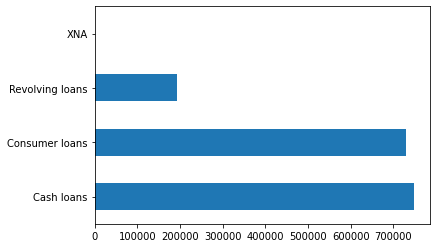

---------------------------------------------------------------------------------------------------- 
 NAME_CASH_LOAN_PURPOSE


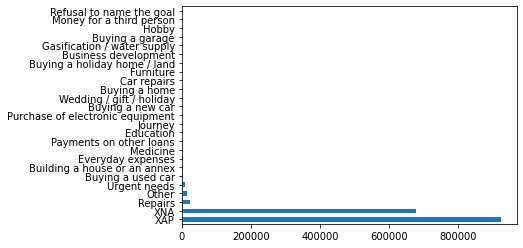

---------------------------------------------------------------------------------------------------- 
 NAME_CONTRACT_STATUS


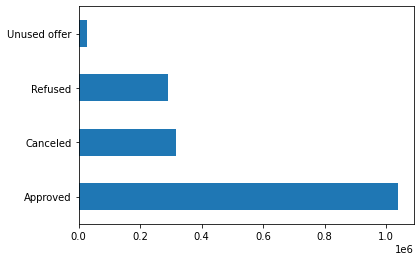

---------------------------------------------------------------------------------------------------- 
 NAME_PAYMENT_TYPE


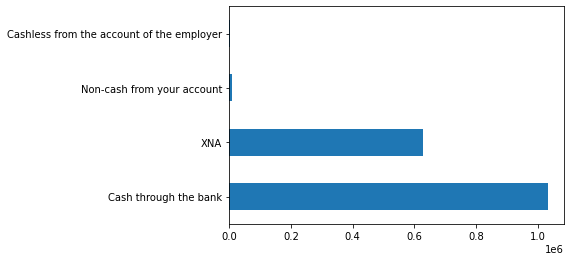

---------------------------------------------------------------------------------------------------- 
 CODE_REJECT_REASON


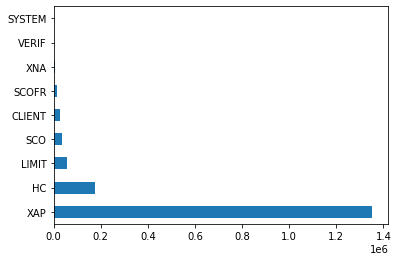

---------------------------------------------------------------------------------------------------- 
 NAME_CLIENT_TYPE


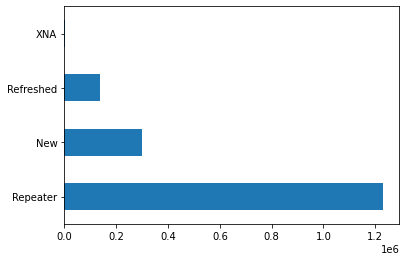

---------------------------------------------------------------------------------------------------- 
 NAME_GOODS_CATEGORY


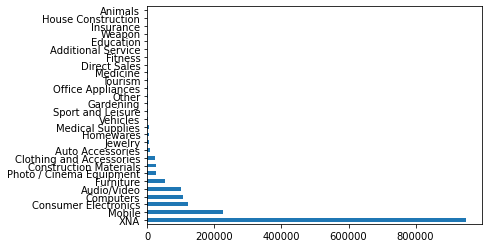

---------------------------------------------------------------------------------------------------- 
 NAME_PORTFOLIO


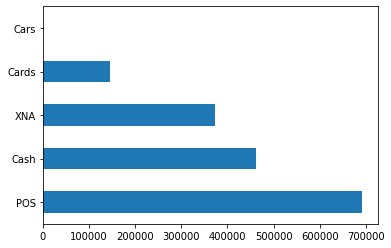

---------------------------------------------------------------------------------------------------- 
 NAME_PRODUCT_TYPE


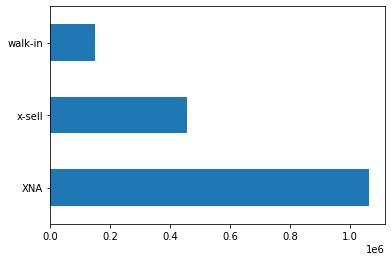

---------------------------------------------------------------------------------------------------- 
 CHANNEL_TYPE


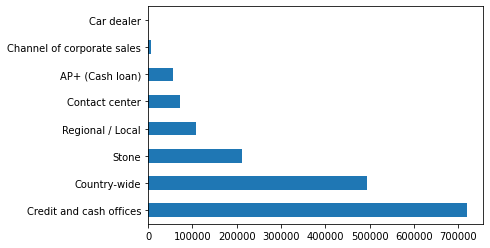

---------------------------------------------------------------------------------------------------- 
 NAME_SELLER_INDUSTRY


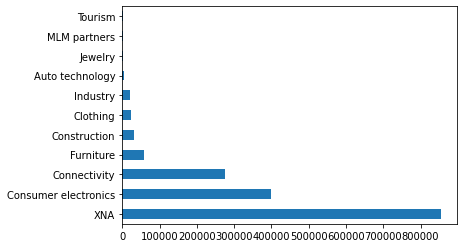

---------------------------------------------------------------------------------------------------- 
 NAME_YIELD_GROUP


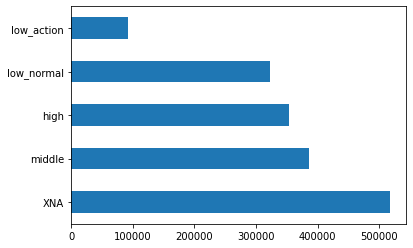

---------------------------------------------------------------------------------------------------- 
 PRODUCT_COMBINATION


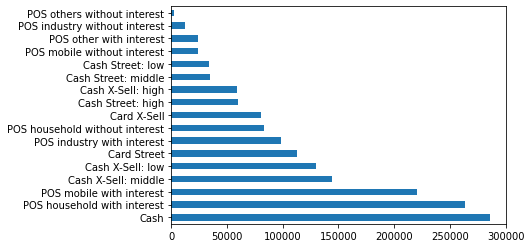

In [40]:
for i in features:
    print("-"*100,"\n",i)
    prev[i].value_counts().plot.barh()
    plt.show()

In [59]:
prev.groupby(['NAME_CONTRACT_STATUS','CODE_REJECT_REASON'] ).size()

NAME_CONTRACT_STATUS  CODE_REJECT_REASON
Approved              XAP                   1036773
                      XNA                         8
Canceled              XAP                    316319
Refused               HC                     175231
                      LIMIT                   55680
                      SCO                     37467
                      SCOFR                   12811
                      SYSTEM                    717
                      VERIF                    3535
                      XAP                         1
                      XNA                      5236
Unused offer          CLIENT                  26436
dtype: int64

## 5.3 Create New Category Count Columns
Pivot cetain column by each unique category within the column and count the categories by id

In [158]:
def create_table(feature):
    table = pd.pivot_table(prev,index =['SK_ID_CURR'], 
                     columns=[feature],
                     values=['SK_ID_PREV'],aggfunc='count',fill_value=0)
    
    #lets rename columns and get rid of multi index
    cols = ["PRE_APP_{}_".format(feature) + c.upper() for c in table.columns.levels[1]]
    
    remove = []
    remove.append(('+',''))
    remove.append(('(',''))
    remove.append((')',''))
    remove.append((' ','_'))
    remove.append(('/',''))
    remove.append(('-',''))
    remove.append(('__','_'))
    for idx,col in enumerate(cols):
        for char in remove:
            cols[idx] = cols[idx].replace(char[0],char[1])
        
    
    table.columns = cols

    table.reset_index(inplace=True)

    def applyMax(feature,df):
        """ Lets set a ceiling value.
        """ 
        column = df[feature].value_counts(normalize=True).reset_index() 
        df[feature] = np.clip(df[feature], 0, column[column[feature]>0.01]['index'].max()) #setting ceiling value

    for i in table.columns:
        if i == "SK_ID_CURR":
            pass
        else:
            applyMax(i, table)
    
    #increase category by 1 to make base category 1
    cols = [c for c in table.columns if c !='SK_ID_CURR']
    for c in cols:
        table[c] = table[c].apply(lambda x: x+1)
    
    return table

In [159]:
#create new dataframe
cat_features = ['NAME_CONTRACT_TYPE',
                'NAME_CONTRACT_STATUS',
                'NAME_CLIENT_TYPE',
                'NAME_PORTFOLIO',
                'NAME_PRODUCT_TYPE',
                'CHANNEL_TYPE',
                'NAME_SELLER_INDUSTRY',
                'NAME_YIELD_GROUP',
                'PRODUCT_COMBINATION']
table_df = create_table(cat_features[0])


In [161]:
for f in cat_features[1:]:
    table = create_table(f)
    table_df = table_df.merge(table,
                                  how='left', 
                                  on='SK_ID_CURR',
                                  validate='one_to_one')

In [162]:
table_df.dtypes

SK_ID_CURR                                                   int64
PRE_APP_NAME_CONTRACT_TYPE_CASH_LOANS                        int64
PRE_APP_NAME_CONTRACT_TYPE_CONSUMER_LOANS                    int64
PRE_APP_NAME_CONTRACT_TYPE_REVOLVING_LOANS                   int64
PRE_APP_NAME_CONTRACT_TYPE_XNA                               int64
                                                             ...  
PRE_APP_PRODUCT_COMBINATION_POS_INDUSTRY_WITHOUT_INTEREST    int64
PRE_APP_PRODUCT_COMBINATION_POS_MOBILE_WITH_INTEREST         int64
PRE_APP_PRODUCT_COMBINATION_POS_MOBILE_WITHOUT_INTEREST      int64
PRE_APP_PRODUCT_COMBINATION_POS_OTHER_WITH_INTEREST          int64
PRE_APP_PRODUCT_COMBINATION_POS_OTHERS_WITHOUT_INTEREST      int64
Length: 62, dtype: object

In [ ]:
for i in table_df.columns[1:]:
    print("-"*100,"\n",i)
    table_df[i].value_counts().plot.bar()

In [ ]:
#lets exclude columns that only have one category
include_features = []
for col in table_df.columns:
    if len(table_df[col].unique()) > 1:
        include_features.append(col)
        
include_features

## 5.4 Create Aggregation Fields

In [61]:
prev[float_col].head()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,1730.430,17145.0,17145.0,0.0,17145.0,0.0,0.182832,0.867336,12.0,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,25188.615,607500.0,679671.0,NaN,607500.0,NaN,NaN,NaN,36.0,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,15060.735,112500.0,136444.5,NaN,112500.0,NaN,NaN,NaN,12.0,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,47041.335,450000.0,470790.0,NaN,450000.0,NaN,NaN,NaN,12.0,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,31924.395,337500.0,404055.0,NaN,337500.0,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
agg_features = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT']

#let get minimum, maximum, average and standard deviation
fun_agg = ['min', 'max', 'mean','std']

agg_fun_df = prev.groupby('SK_ID_CURR')[agg_features].agg(fun_agg)

#rename columns
agg_fun_df.columns = ["{}_{}".format(c[0],c[1].upper()) for c in agg_fun_df.columns.values.tolist()]

#let fill nan values
agg_fun_df.fillna(0, inplace=True)
agg_fun_df.reset_index(inplace=True)

In [76]:
agg_fun_df.head()

,SK_ID_CURR,AMT_ANNUITY_MIN,AMT_ANNUITY_MAX,AMT_ANNUITY_MEAN,AMT_ANNUITY_STD,AMT_APPLICATION_MIN,AMT_APPLICATION_MAX,AMT_APPLICATION_MEAN,AMT_APPLICATION_STD,AMT_CREDIT_MIN,AMT_CREDIT_MAX,AMT_CREDIT_MEAN,AMT_CREDIT_STD
0,100001,3951.000,3951.000,3951.000,0.000000,24835.5,24835.5,24835.50,0.000000,23787.0,23787.0,23787.00,0.000000
1,100002,9251.775,9251.775,9251.775,0.000000,179055.0,179055.0,179055.00,0.000000,179055.0,179055.0,179055.00,0.000000
2,100003,6737.310,98356.995,56553.990,46332.557777,68809.5,900000.0,435436.50,424161.620549,68053.5,1035882.0,484191.00,497949.861808
3,100004,5357.250,5357.250,5357.250,0.000000,24282.0,24282.0,24282.00,0.000000,20106.0,20106.0,20106.00,0.000000
4,100005,4813.200,4813.200,4813.200,0.000000,0.0,44617.5,22308.75,31549.336810,0.0,40153.5,20076.75,28392.812138


## 5.5 Combine dataset
Combined the aggregate features dataframe and category dataframe

In [ ]:
final_df = agg_fun_df.merge(table_df[include_features],
                    how='left', 
                    on='SK_ID_CURR',
                    validate='one_to_one')

In [ ]:
final_df.head()

## 5.6 Save final dataset to file

In [ ]:
final_df.to_csv(r'C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\results\1_5_previous_applications.csv',index=False)